# Your mission

You started working in a financial institution. You manager Mark is insterested in investing and trading **Bitcoin** to diversify his portfolio. So he turned to you to develop a crypto trading bot.

A **crypto trading bot** is a computer program with an underlying predictive model that automatically outputs a predicted day to day price for the next 30 days based on the history of Bitcoin market price and Blockchain variables. 

Your mission is to train an accurate predictive model with the lowest mean squared error. Mark is a very technical guy, he likes to understand all **technical details** and would like you to **compare the performances of classical models and neural-net based models**.

Your **target variable** is the Bitcoin Market price.

**Data source** : https://blockchain.info/

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import helper_functions as hf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.dates as mdates
from datetime import datetime


CURDIR = os.path.dirname(os.getcwd())
DATADIR = os.path.join(CURDIR,  "data")
%matplotlib inline

# Data Exploration

In this section, you are to explore the data. You are to fulfill the following tasks:
- **Univariate analysis**
    - study the Bitcoin market price time series, in terms of its trend, cycle, seasonality, and stationnarity 
    - **Tips**: you can analyse ACF, PACF plots, perform Augmented Dickey-Fuller test
- **Multivariate analysis**
    - study other blockchain variables, retrieve insights
    - study the correlation between the Bitcoin market price and other blockchain variables 
    - **Tips**: Pearson correlation

In [1]:
df_blockchain = pd.read_csv(os.path.join(DATADIR, "df_blockchain.csv"), 
                            delimiter=",")


NameError: name 'pd' is not defined

In [3]:
df_blockchain

Date  market-price  n-transactions-per-block  \
0     2011-09-13          6.88                 45.908451   
1     2011-09-14          6.19                 42.465753   
2     2011-09-15          5.92                 41.500000   
3     2011-09-16          5.58                 52.176471   
4     2011-09-17          5.18                 40.701493   
...          ...           ...                       ...   
3539  2021-05-22      37280.35               1929.310345   
3540  2021-05-23      37528.30               1632.941176   
3541  2021-05-24      34754.54               1863.134921   
3542  2021-05-25      38728.59               1899.544715   
3543  2021-05-26      38410.50                       NaN   

      median-confirmation-time     hash-rate    difficulty  miners-revenue  \
0                     0.000000  1.201882e+01  1.777774e+06    5.231801e+04   
1                     0.000000  1.326393e+01  1.755425e+06    4.830647e+04   
2                     0.000000  1.291487e+01  1.755425e+06    6.043144e+04   
3                     0.000000  1.099510e+01  1.755425e+06    3.434502e+04   
4                     0.000000  1.073331e+01  1.755425e+06    3.680591e+04   
...                        ...           ...           ...             ...   
3539                 16.916667  1.444278e+08  2.504649e+13    3.107614e+07   
3540                 10.233333  1.481631e+08  2.504649e+13    2.894416e+07   
3541                 10.725000  1.568785e+08  2.504649e+13    3.266880e+07   
3542                 12.575000  1.531433e+08  2.504649e+13    3.257793e+07   
3543                       NaN           NaN           NaN             NaN   

      trade-volume    blocks-size  avg-block-size  ...  cost-per-transaction  \
0     0.000000e+00     592.190091        0.019009  ...              7.666766   
1     0.000000e+00     594.907367        0.018007  ...              7.369408   
2     0.000000e+00     597.554226        0.018240  ...              7.333913   
3     0.000000e+00     600.362512        0.022136  ...              5.466341   
4     0.000000e+00     602.995510        0.017116  ...              6.489054   
...            ...            ...             ...  ...                   ...   
3539  1.438210e+09  346378.108377        1.289550  ...            138.856769   
3540  6.660316e+08  346527.706387        1.379972  ...            148.951003   
3541  1.106858e+09  346691.878524        1.345943  ...            139.161241   
3542  1.032789e+09  346861.353216        1.359463  ...            139.434045   
3543  7.191548e+08            NaN             NaN  ...                   NaN   

      n-unique-addresses  n-transactions  n-transactions-total  \
0                12622.0          6519.0             1497195.0   
1                12408.0          6200.0             1503780.0   
2                12988.0          6474.0             1509972.0   
3                12059.0          6209.0             1516381.0   
4                10988.0          5454.0             1522600.0   
...                  ...             ...                   ...   
3539            603588.0        223800.0           643953439.0   
3540            555526.0        194320.0           644175796.0   
3541            643231.0        234755.0           644370643.0   
3542            640506.0        233644.0           644605027.0   
3543                 NaN             NaN                   NaN   

      n-transactions-excluding-popular  output-volume  \
0                               6519.0   3.585436e+05   
1                               6200.0   3.026190e+05   
2                               6474.0   2.992261e+05   
3                               6209.0   6.746069e+05   
4                               5454.0   3.541989e+05   
...                                ...            ...   
3539                          220859.0   2.363176e+06   
3540                          191590.0   2.230243e+06   
3541                          231931.0   2.610429e+06   
3542                          

In [4]:
df_blockchain.columns.sort_values().shape


(23,)

## Trend

Text(0.5, 1.0, 'log market prices')

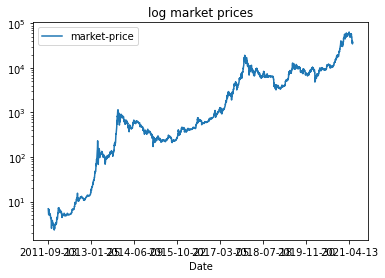

In [5]:
df_blockchain.plot(x="Date",y="market-price")
plt.yscale("log")
plt.title("log market prices")


We see that there is a trend in the market-price series.

## Autocorrelaiton and Partial correlation

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

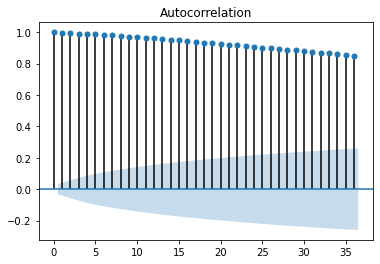

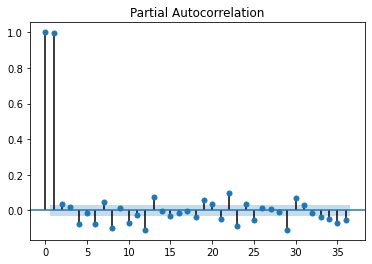

In [6]:
plot_acf(df_blockchain["market-price"]),plot_pacf(df_blockchain["market-price"])

Since the Autocorrelation decreases slowly, we can see that the time series is likely to be not stationary. 

## Augmented Dickey-Fuller test

In [7]:
#p-value of augmented dickey-fuller test
adfuller(df_blockchain["market-price"].values)[1]

0.8890100827558736

The p-value is greater than $0.05$. Therefore, we cannot guaranteee that the time series is stationary according to the augmented Dickey-Fuller test.

## Split Data

In [8]:
X_train, X_test = hf.data_split(df_blockchain)

# Modeling with ARIMA

## Search for the best ARIMA model
We use grid search to search for the best ARIMA parameters that gives the lowest error. This follows the Box-Jenkins methology.

In [9]:
best_cfg, best_score = hf.arima_grid_search(X_train["market-price"], 
                                            X_test["market-price"],
                                            np.arange(1,3), np.arange(3), np.arange(3))


C:\Users\Souf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Souf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Souf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Souf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Souf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params availab

The best ARIMA model is then a (1,1,2) since its RMSE is minimal

## Visualization
To have a better view on the difference between true and predict values, we visualize them by plotting both the signals.

In [10]:
# prepare the dataset for plotting
predictions = hf.evaluate_arima_model(X_train["market-price"],X_test["market-price"],(1,1,2))[1]
predict_date = df_blockchain.iloc[-30::]["Date"]
df_predict = pd.DataFrame(zip(predict_date,
                              predictions, X_test["market-price"].values),
                          columns=["date", "predict", "true"])

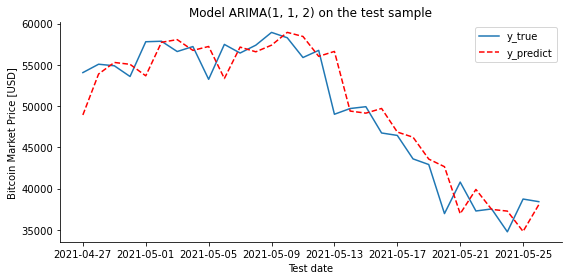

In [11]:
fig, ax = plt.subplots(figsize=(8,4))

sns.lineplot(x="date", y="true", data=df_predict, 
             ax=ax, label="y_true", markers=True )
plot_ = sns.lineplot(x="date",
             y="predict",
             data=df_predict,
             color="red",ax=ax, label="y_predict")
plot_.lines[1].set_linestyle("--")
new_ticks = plot_.get_xticklabels()
freq = 4
ax.set_xticks(np.arange(0, len(new_ticks), freq))
labels = predict_date[::freq]
ax.set_xticklabels(labels)
ax.set_ylabel("Bitcoin Market Price [USD]")
ax.set_xlabel("Test date")
ax.set_title(f"Model ARIMA{(1,1,2)} on the test sample")
sns.despine()
plt.legend()
plt.tight_layout()


# Regression with multiple features

In [12]:
df_standard=df_blockchain.iloc[:-1,1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
corr = df_standard.iloc[:,:].corr()
corr[corr["market-price"]>0.60]["market-price"]


market-price                        1.000000
hash-rate                           0.785757
difficulty                          0.787926
miners-revenue                      0.934751
blocks-size                         0.721522
transaction-fees-usd                0.731287
cost-per-transaction                0.885611
n-unique-addresses                  0.623646
n-transactions-total                0.718141
estimated-transaction-volume-usd    0.904408
market-cap                          0.999315
Name: market-price, dtype: float64

We see that the highly correlated features are the Market cap, the miners revenue, the estimated transaction volume in USD and the cost per transaction.

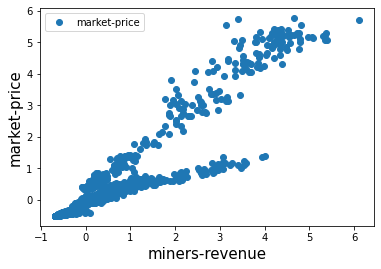

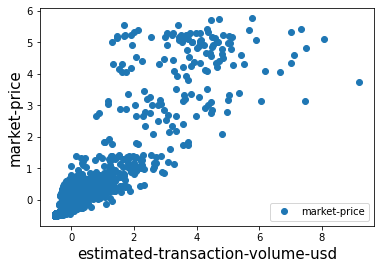

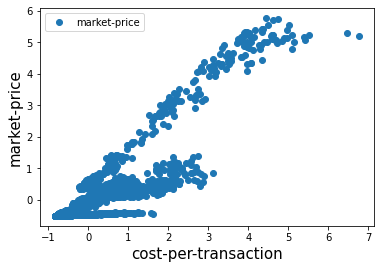

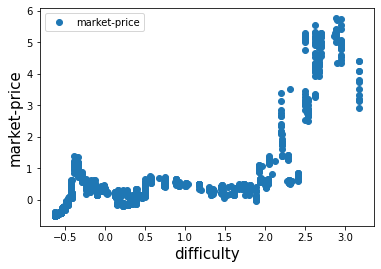

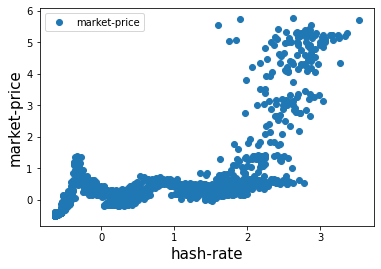

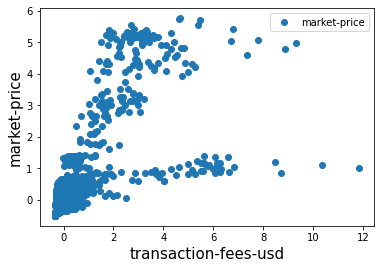

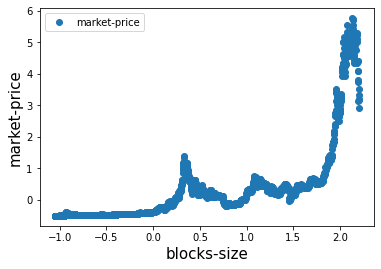

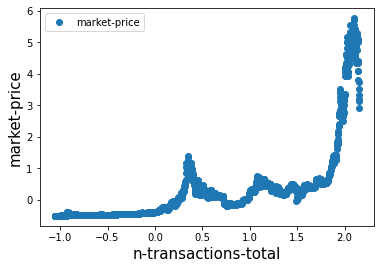

In [13]:

features = ["miners-revenue","estimated-transaction-volume-usd","cost-per-transaction","difficulty","hash-rate","transaction-fees-usd","blocks-size","n-transactions-total"]


for ft in features : 
    fig = df_standard.plot(x=ft, y="market-price", style="o")
    fig.set_ylabel("market-price", fontsize=15)
    fig.set_xlabel(ft, fontsize=15)




In [14]:
df_standard=df_blockchain.iloc[:-1,1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
corr = np.abs(df_standard.iloc[:,:].corr()["market-price"].drop(["market-price","market-cap"])).sort_values(ascending=False)
ft = list(corr.index)
X_train_standard , X_test_standard = hf.data_split(df_standard)
table = pd.DataFrame(columns = ["Number of features","minimal correlation","R^2","AIC","Adfuller","RMSE","training-RMSE"])




for i in range(1,21):
    X_T = X_train[ft[:i]]
    X_T = sm.add_constant(X_T)
    X_T = X_T.fillna(method='ffill')
    y_T = X_train["market-price"]
    y_T = y_T.fillna(method='ffill')
    X_t = X_test[ft[:i]].iloc[:-1]
    X_t = sm.add_constant(X_t)  # add the intercept term => necessary to
    y_t = X_test["market-price"].iloc[:-1]
    ols5 = sm.OLS(y_T, X_T).fit()
    ypred_t = ols5.predict(X_t)
    ypred_T = ols5.predict(X_T)
    RMSE = np.sqrt(np.mean((y_t - ypred_t) ** 2))  
    RMSE_T = np.sqrt(np.mean((y_T - ypred_T)** 2)) 
    residuals = y_t - ypred_t
    cor_min = min(corr.values[:i])
    new_row = pd.Series(data={"Number of features" : i,"minimal correlation" : cor_min,"R^2" : ols5.rsquared,"AIC" : ols5.aic, "Adfuller" : adfuller(residuals)[1], "RMSE" : RMSE, "training-RMSE" : RMSE_T })
    table = table.append(new_row, ignore_index=True)

table.set_index("Number of features")




minimal correlation       R^2           AIC  Adfuller  \
Number of features                                                          
1.0                            0.934751  0.861766  67222.461579  0.222560   
2.0                            0.904408  0.892506  66340.634520  0.640114   
3.0                            0.885611  0.895369  66247.782596  0.739979   
4.0                            0.787926  0.914175  65553.549372  0.988253   
5.0                            0.785757  0.916122  65474.898883  0.913520   
6.0                            0.731287  0.916828  65447.201438  0.923241   
7.0                            0.721522  0.934337  64618.572558  0.992088   
8.0                            0.718141  0.953332  63420.619515  0.995840   
9.0                            0.623646  0.954559  63329.007929  0.995143   
10.0                           0.585375  0.956220  63200.199510  1.000000   
11.0                           0.542280  0.958642  63002.145710  0.998144   
12.0                           0.516981  0.959007  62972.983995  0.996707   
13.0                           0.479034  0.960308  62861.730649  0.995374   
14.0                           0.476153  0.960408  62854.793456  0.971419   
15.0                           0.472213  0.964794  62444.212332  0.326360   
16.0                           0.263986  0.965307  62394.632276  0.304518   
17.0                           0.224723  0.965812  62345.144351  0.282754   
18.0                           0.163434  0.966069  62320.648667  0.295340   
19.0                           0.125954  0.966370  62291.275319  0.278587   
20.0                           0.003241  0.966393  62290.922782  0.273185   

                            RMSE  training-RMSE  
Number of features                               
1.0                 12285.886124    3447.626547  
2.0                 10509.683581    3040.214464  
3.0                  9981.776204    2999.458495  
4.0                  9554.150097    2716.559375  
5.0                  9763.722433    2685.563426  
6.0                  9850.685785    2674.239279  
7.0                  7875.385630    2376.137912  
8.0                  6910.632124    2003.183241  
9.0                  6572.952944    1976.678146  
10.0                 6234.112427    1940.227558  
11.0                 5910.738693    1885.777139  
12.0                 5765.722041    1877.434230  
13.0                 5671.206945    1847.422607  
14.0                 5559.718710    1845.074815  
15.0                 4949.828927    1739.877116  
16.0                 4820.391437    1727.154515  
17.0                 5331.065108    1714.547422  
18.0                 5182.418557    1708.095717  
19.0                 5157.219836    1700.487685  
20.0                 5152.312603    1699.918563

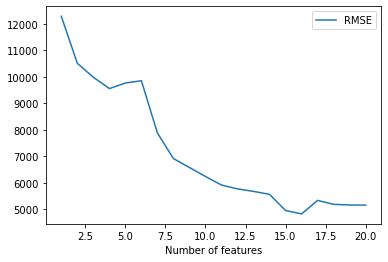

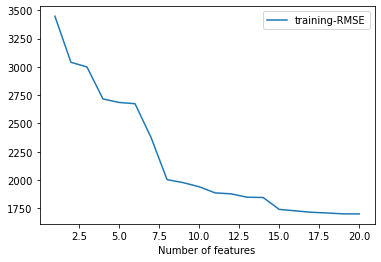

In [15]:
table.plot(x="Number of features", y= "RMSE")
table.plot(x="Number of features", y= "training-RMSE")

We chose to do a multivariate regression because the AIC was better for 3 features than the AIC with one or two features.

In [16]:
X_train_standard , X_test_standard = hf.data_split(df_standard)
X = X_train_standard[features]
X = sm.add_constant(X)  # add the intercept term => necessary to
y = X_train_standard["market-price"]
ols3 = sm.OLS(y, X).fit()
ypred=ols3.predict(X)
ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market-price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     8887.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:41:51   Log-Likelihood:                 706.52
No. Observations:                3513   AIC:                            -1395.
Df Residuals:                    3504   BIC:                            -1340.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0007      0.003      0.219      0.827      -0.006       0.007
miners-revenue                       0.5286      0.019     27.342      0.000       0.491       0.567
estimated-transaction-volume-usd     0.2601      0.009     27.509      0.000       0.242       0.279
cost-per-transaction                 0.0930      0.012      8.076      0.000       0.070       0.116
difficulty                           0.8971      0.031     28.506      0.000       0.835       0.959
hash-rate                           -0.3576      0.032    -11.296      0.000      -0.420      -0.296
transaction-fees-usd                -0.0377      0.008     -4.971      0.000      -0.053      -0.023
blocks-size                          9.4879      0.261     36.370      0.000       8.976       9.999
n-transactions-total                -9.8786      0.262    -37.738      0.000     -10.392      -9.365
==============================================================================
Omnibus:                      825.325   Durbin-Watson:                   0.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6864.763
Skew:                           0.881   Prob(JB):                         0.00
Kurtosis:                       9.618   Cond. No.                         262.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have $R^2 = 0.895 \simeq 1 $ so the linear regression is good.

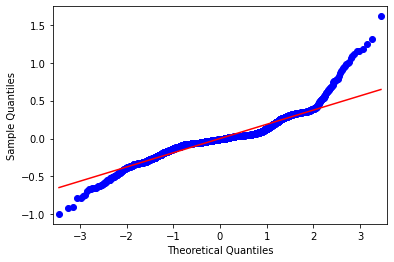

In [17]:
residuals = y - ypred
fig = sm.qqplot(residuals, line="r")

For a Normal distributions of the error terms in the regression model, the residual would be distributed close to the red line. Therefore, here it's difficult to validate the asssumption of normal residuals for the edge values of the theoretical quantiles. 

In [18]:
adfuller(residuals)[1]

0.00017768229523953404

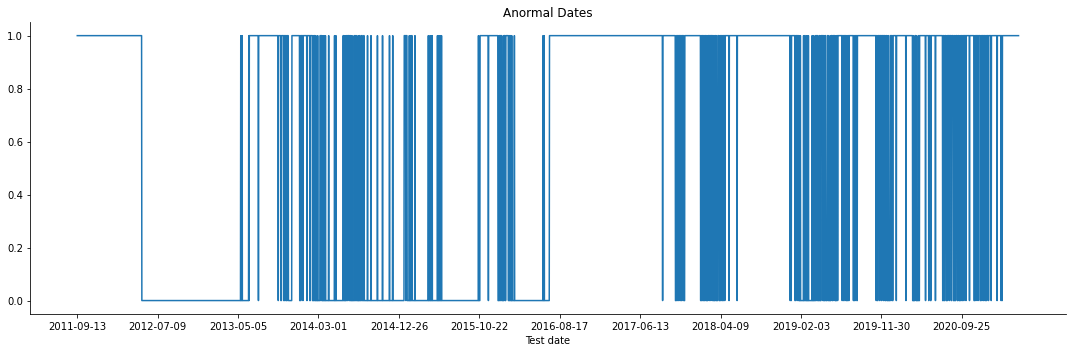

In [19]:
df = pd.DataFrame(residuals.values,  columns=["Values"])
df.index = df_blockchain.iloc[:-31]["Date"].values
df.sort_values(by=['Values'], inplace=True)
D = list(df[df['Values']<-0.05].index)+list(df[df['Values']>0.05].index)
D.sort()
L=[]
for i in range(len(df_blockchain["Date"].values[:-31])):
    if df_blockchain["Date"].values[:-31][i] in D:
        L.append(1)
    else : 
        L.append(0)

fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(x = df_blockchain["Date"].values[:-31], y = L )
freq = 300
ax.set_xticks(np.arange(0, 3513, freq))
labels = predict_date[::freq]
ax.set_xlabel("Test date")
ax.set_title(f"Anormal Dates")
sns.despine()
plt.tight_layout()





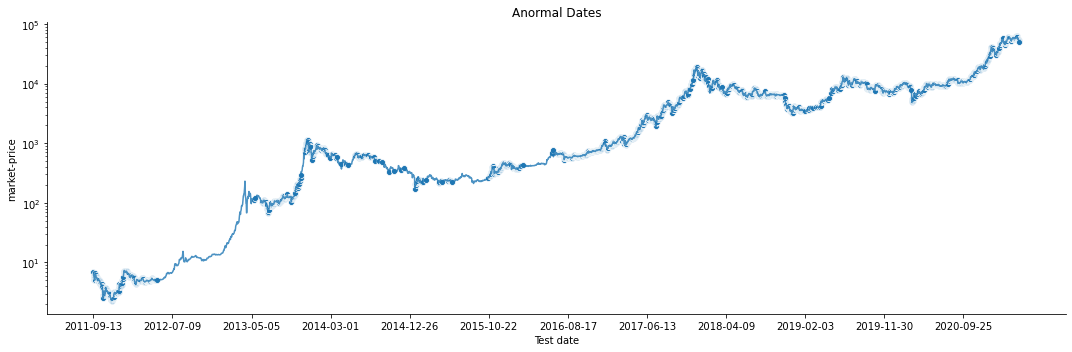

In [20]:
Ind = [ df_blockchain['Date'].values[i] in D for i in range(len(df_blockchain['Date'].values))]
P = []
for i in range(len(Ind)) : 
    if Ind[i] == True :
        P.append(df_blockchain['market-price'][i])

fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(x = "Date", y = "market-price" , data =df_blockchain[:-31], alpha = 0.8)
plot_ = sns.scatterplot(x = D , y = P , alpha = 1)
new_ticks = plot_.get_xticklabels()
freq = 300
ax.set_xticks(np.arange(0, 3513, freq))
labels = predict_date[::freq]
plt.yscale("log")
ax.set_xlabel("Test date")
ax.set_title(f"Anormal Dates")
sns.despine()
plt.tight_layout()

In [21]:
X_t = X_test[features].iloc[:-1]
X_t = sm.add_constant(X_t)  # add the intercept term => necessary to
y_t = X_test["market-price"].iloc[:-1]
ols5 = sm.OLS(y_t, X_t).fit()
ypred_t = ols5.predict(X_t)
print(ols5.summary())


                            OLS Regression Results                            
Dep. Variable:           market-price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     63.36
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           1.07e-12
Time:                        09:42:08   Log-Likelihood:                -255.89
No. Observations:                  29   AIC:                             527.8
Df Residuals:                      21   BIC:                             538.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

The regression on the test sample has a $R^2 = 0.872 \simeq 1 $ which is not a  pretty good for a linear regression.

RMS: 1644.02


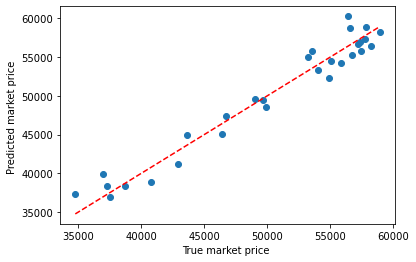

In [22]:
plt.scatter(y_t, ypred_t)
plt.plot([min(y_t), max(y_t)], [min(y_t), max(y_t)], '--r')
plt.axis('tight')
plt.xlabel('True market price ')
plt.ylabel('Predicted market price ')
print("RMS: {:.2f}".format(np.sqrt(np.mean((y_t - ypred_t) ** 2))))


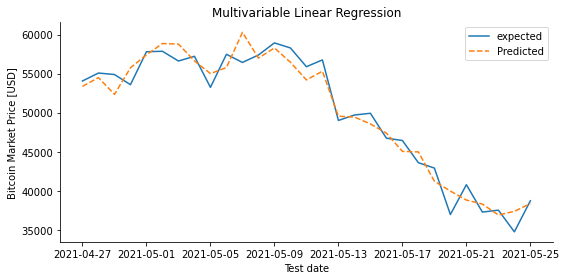

In [23]:
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x = df_blockchain["Date"].values[-29:], y = y_t , label = "expected")
plot_ = sns.lineplot(x = df_blockchain["Date"].values[-29:], y = ypred_t , label = "Predicted")
plot_.lines[1].set_linestyle("--")
new_ticks = plot_.get_xticklabels()
freq = 4
ax.set_xticks(np.arange(0, 29, freq))
labels = predict_date[::freq]
ax.set_xticklabels(labels)
ax.set_ylabel("Bitcoin Market Price [USD]")
ax.set_xlabel("Test date")
ax.set_title(f"Multivariable Linear Regression")
sns.despine()
plt.legend()
plt.tight_layout()

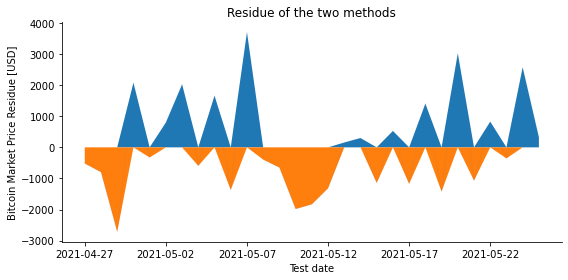

In [24]:
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x = df_blockchain["Date"].values[-29:], y= ypred_t - df_predict["predict"].values[-29:], alpha = 0.05)
plt.fill_between(df_blockchain["Date"].values[-29:],0,np.clip(ypred_t - df_predict["predict"].values[-29:],0,np.inf))
plt.fill_between(df_blockchain["Date"].values[-29:],np.clip(ypred_t - df_predict["predict"].values[-29:],-np.inf,0),0)
new_ticks = plot_.get_xticklabels()
freq = 5
ax.set_xticks(np.arange(0, 29, freq))
labels = predict_date[::freq]
ax.set_xticklabels(labels)
ax.set_ylabel("Bitcoin Market Price Residue [USD]")
ax.set_xlabel("Test date")
ax.set_title(f"Residue of the two methods")
sns.despine()
plt.tight_layout()

In [25]:
miners = 

SyntaxError: invalid syntax (<ipython-input-25-5235d9bc5c92>, line 1)